<a href="https://colab.research.google.com/github/AmirJlr/CNN/blob/master/Intro_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt

The fundamental difference between a densely connected layer and a convolution
layer is this: Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn
local patterns

# MNIST Task

In [2]:
# Input tensors of shape (image_height, image_width, image_channels):
inputs = layers.Input((28, 28, 1))

x = layers.Conv2D(filters=32, kernel_size=3)(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3)(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3)(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation=keras.activations.softmax)(x)


model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype("float32") / 255

x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype("float32") / 255


In [8]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [9]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 14s 4ms/step - loss: 0.1557 - accuracy: 0.9521
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0684 - accuracy: 0.9793
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0552 - accuracy: 0.9827
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0463 - accuracy: 0.9856
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0402 - accuracy: 0.9876


In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9843


In [11]:
test_loss

0.04793506860733032

In [12]:
test_acc

0.9843000173568726

# Cat vs Dog Kaggle Task

### Download kaggle data :

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amirjlr","key":"11c5169275a9964f9f81408f50565316"}'}

In [18]:
!mkdir ~/.kaggle # create .kaggle folder in workspace
!cp kaggle.json ~/.kaggle/  # copy kaggle.json file into kaggle folder
!chmod 600 ~/.kaggle/kaggle.json    #make sure that the file is only readable by the current user

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [19]:
# download data
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:39<00:00, 22.3MB/s]
100% 812M/812M [00:39<00:00, 21.6MB/s]


In [21]:
# unzip file :
!unzip -qq dogs-vs-cats.zip

replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [22]:
!unzip -qq train.zip

we’ll create a new dataset containing three subsets: a training set with 1,000 samples of each class, a validation set with 500 samples of each class, and a test set with 1,000 samples of each
class

cats_vs_dogs_small/

train/

...........cat/  

...........dog/      

validation/

...........cat/       

...........dog/    

test/

...........cat/   

...........dog/ 

In [23]:
import os, shutil, pathlib

In [24]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

In [28]:
def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    # os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]

    for fname in fnames:
      shutil.copyfile(src=original_dir / fname, dst=dir / fname)


make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

Building the model :

In [29]:
inputs = keras.Input(shape=(180, 180, 3))

x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

In [30]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [32]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

Data preprocessing

In [33]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(new_base_dir / "train", image_size=(180, 180), batch_size=32)
validation_dataset = image_dataset_from_directory(new_base_dir / "validation", image_size=(180, 180), batch_size=32)
test_dataset = image_dataset_from_directory(new_base_dir / "test", image_size=(180, 180), batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [34]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [35]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch.keras",
save_best_only=True,
monitor="val_loss")
]

In [36]:
history = model.fit(
train_dataset,
epochs=30,
validation_data=validation_dataset,
callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 9s 75ms/step - loss: 0.7292 - accuracy: 0.5050 - val_loss: 0.7083 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6935 - accuracy: 0.5255 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 3/30
63/63 [==============================] - 5s 74ms/step - loss: 0.6934 - accuracy: 0.5455 - val_loss: 0.7019 - val_accuracy: 0.5220
Epoch 4/30
63/63 [==============================] - 4s 61ms/step - loss: 0.6768 - accuracy: 0.5880 - val_loss: 0.6687 - val_accuracy: 0.5820
Epoch 5/30
63/63 [==============================] - 5s 84ms/step - loss: 0.6403 - accuracy: 0.6215 - val_loss: 0.6256 - val_accuracy: 0.6660
Epoch 6/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6034 - accuracy: 0.6820 - val_loss: 0.6822 - val_accuracy: 0.6360
Epoch 7/30
63/63 [==============================] - 6s 90ms/step - loss: 0.5858 - accuracy: 0.6870 - val_loss: 0.6017 - val_accuracy: 0.6810
Epoch 8/30
63

- ### Displaying curves of loss and accuracy during training

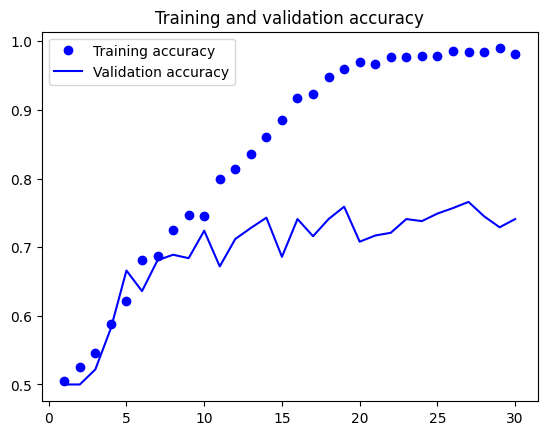

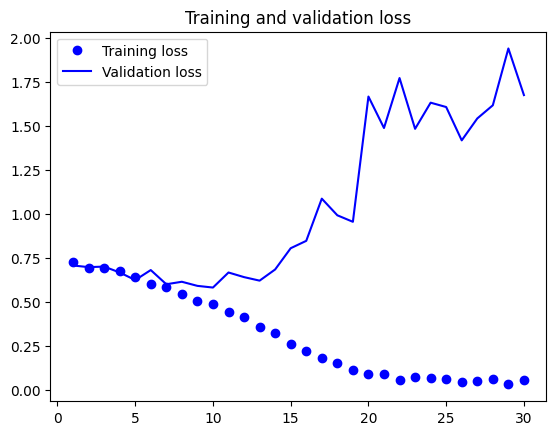

In [38]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

- ### Evaluating the model on the test set

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

## Using Data Augmentation

Data augmentation takes the approach of generating more training data
from existing training samples by augmenting the samples via a number of random
transformations

- ### Define a data augmentation stage to add to an image model

In [39]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
  ]
)

- ### Displaying some randomly augmented training images

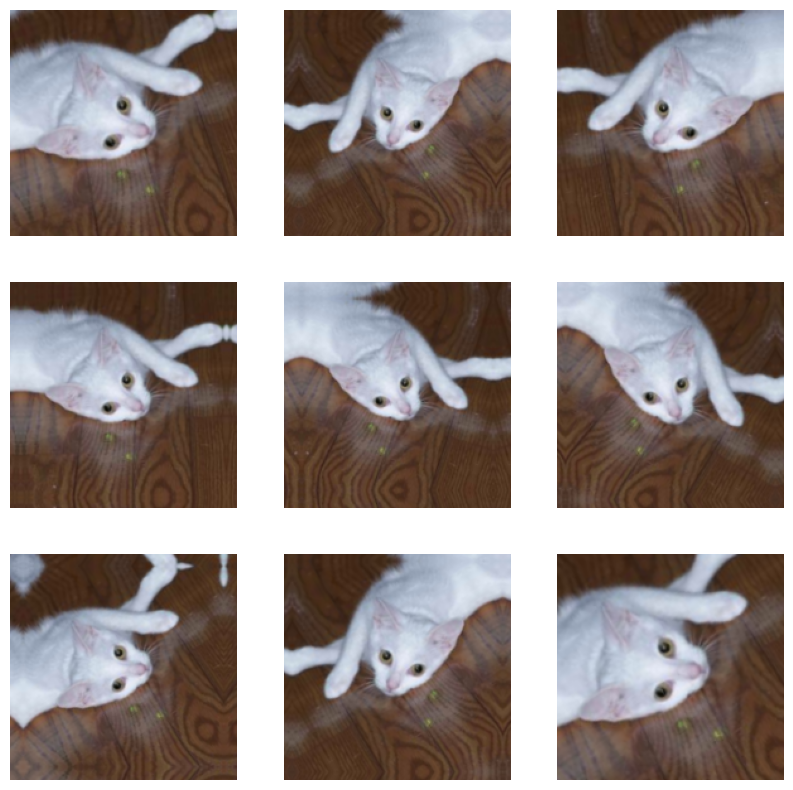

In [45]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Defining a new ConvNet that includes image augmentation and dropout

In [46]:
inputs = keras.Input(shape=(180, 180, 3))

x = data_augmentation(inputs)

x = layers.Rescaling(1./255)(x)

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)

x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [48]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

### Training the regularized ConvNet

In [52]:
callbacks = [
keras.callbacks.ModelCheckpoint(
filepath="convnet_from_scratch_with_augmentation.keras",
save_best_only=True,
monitor="val_loss")
]

In [53]:
history = model.fit(train_dataset, epochs=100, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 6s 88ms/step - loss: 0.1705 - accuracy: 0.9385 - val_loss: 0.5808 - val_accuracy: 0.8630
Epoch 2/100
63/63 [==============================] - 4s 61ms/step - loss: 0.1616 - accuracy: 0.9420 - val_loss: 0.8365 - val_accuracy: 0.8600
Epoch 3/100
63/63 [==============================] - 4s 62ms/step - loss: 0.1567 - accuracy: 0.9440 - val_loss: 0.6344 - val_accuracy: 0.8430
Epoch 4/100
63/63 [==============================] - 5s 78ms/step - loss: 0.1797 - accuracy: 0.9365 - val_loss: 0.7790 - val_accuracy: 0.8480
Epoch 5/100
63/63 [==============================] - 4s 65ms/step - loss: 0.1658 - accuracy: 0.9405 - val_loss: 1.0955 - val_accuracy: 0.8100
Epoch 6/100
63/63 [==============================] - 5s 76ms/step - loss: 0.1509 - accuracy: 0.9480 - val_loss: 0.6745 - val_accuracy: 0.8690
Epoch 7/100
63/63 [==============================] - 4s 62ms/step - loss: 0.1610 - accuracy: 0.9470 - val_loss: 0.7888 - val_accuracy: 0.8410
Epoch 

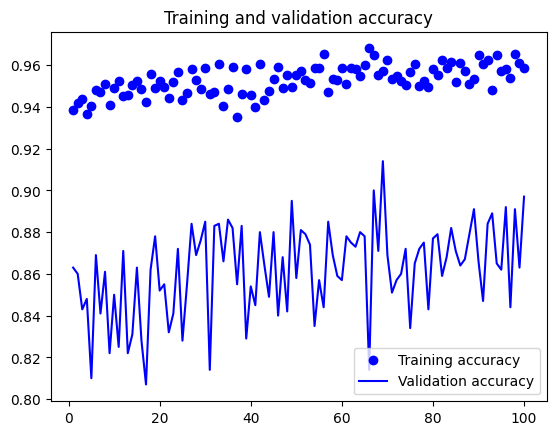

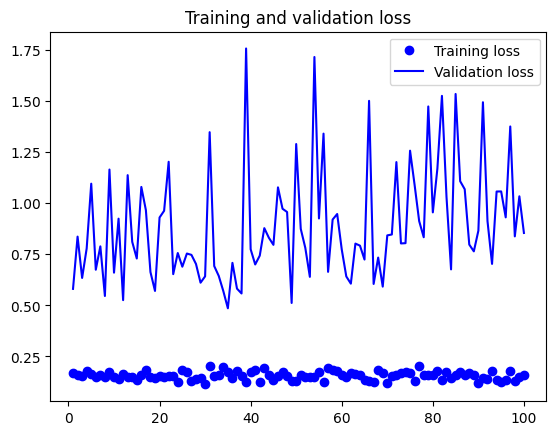

In [54]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

- ### Evaluating the model on the test set

In [55]:
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

test_loss, test_acc = test_model.evaluate(test_dataset)

print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 34ms/step - loss: 0.6777 - accuracy: 0.8725
Test accuracy: 0.873


## Leveraging a pretrained model

There are two ways to use a pretrained model: feature extraction and fine-tuning.